# Measuring Helbig's requirements for unmarked intertextuality


### Imports

In [22]:
# General
import os
import glob

# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Variables

In [23]:
unit = "line"
data_dir = '../data/' + unit + '/preprocessed/'
cutoff = 7

### Data

In [24]:
filenames = np.array(glob.glob(data_dir+'*.csv'))
#print(filenames)

names = filenames
names = [os.path.basename(name) for name in names]
names = [os.path.splitext(name)[0] for name in names]
names = [name.replace('lucan-','') for name in names]

print(names)

['ovid-amores', 'ovid-ars_amatoria', 'ovid-heroides', 'ovid-medicamina', 'ovid-remedia_amoris', 'propertius-elegies', 'tibullus-elegies', 'vergil-aeneid']


In [25]:
dfs = [pd.read_csv(filename) for filename in filenames]

In [26]:
# Works/lines
ovid_amores_book_lengths = [763, 812, 870]
ovid_ars_book_lengths = [772, 746, 812]
ovid_heroides_book_lengths = [116, 148, 154, 176, 150, 166, 198, 120, 168, 152, 130, 214, 160, 130, 220, 378, 268, 218, 210, 244, 250 ]
ovid_medicamina_book_lengths = [100]
ovid_remedia_book_lengths = [814]
propertius_book_lengths = [703, 1359, 986, 934]
tibullus_book_lengths = [811, 430, 688]
vergil_book_lengths = [756, 804, 718, 705, 871, 901, 817, 731, 818, 908, 915, 952]

book_lengths = [sum(ovid_amores_book_lengths),sum(ovid_ars_book_lengths),sum(ovid_heroides_book_lengths),sum(ovid_medicamina_book_lengths),sum(ovid_remedia_book_lengths),sum(propertius_book_lengths),sum(tibullus_book_lengths),sum(vergil_book_lengths)]

print(book_lengths)

[2445, 2330, 3970, 100, 814, 3982, 1929, 9896]


In [27]:
counts = [] 
for df in dfs: 
    temp = len(df.index)
    counts.append(temp)
    
for i, text in enumerate(filenames):
    print(text)
    print(counts[i])

../data/line/preprocessed/lucan-ovid-amores.csv
9966
../data/line/preprocessed/lucan-ovid-ars_amatoria.csv
9235
../data/line/preprocessed/lucan-ovid-heroides.csv
18646
../data/line/preprocessed/lucan-ovid-medicamina.csv
285
../data/line/preprocessed/lucan-ovid-remedia_amoris.csv
3711
../data/line/preprocessed/lucan-propertius-elegies.csv
13812
../data/line/preprocessed/lucan-tibullus-elegies.csv
6860
../data/line/preprocessed/lucan-vergil-aeneid.csv
46385


In [28]:
dfs_cutoff = []

for df in dfs:
    dfs_cutoff.append(df[df['SCORE'] >= cutoff])

In [29]:
scores = []

for df in dfs_cutoff: 
    temp = df.groupby('SCORE').agg({'SCORE': [np.size]})
    scores.append(temp)

print(scores)

[      SCORE
       size
SCORE      
7      1854
8       451
9        67
10       12,       SCORE
       size
SCORE      
7      1684
8       349
9        65
10        3,       SCORE
       size
SCORE      
7      3139
8       734
9       169
10        5,       SCORE
       size
SCORE      
7        33
8         6
9         2
10        1,       SCORE
       size
SCORE      
7       583
8       101
9        15
10        2,       SCORE
       size
SCORE      
7      2703
8       628
9       126
10       13,       SCORE
       size
SCORE      
7      1472
8       358
9        51
10        6,       SCORE
       size
SCORE      
7      8685
8      2116
9       564
10       86]


In [30]:
results = [list(x) for x in zip(names, book_lengths, dfs_cutoff, scores)]

In [31]:
for result in results:
    result[3]['per_100'] = result[3]['SCORE']['size'].map(lambda x: (x / result[1]) * 100)

In [32]:
y1 = np.array(results[0][3]['per_100'])
y2 = np.array(results[1][3]['per_100'])
y3 = np.array(results[2][3]['per_100'])
y4 = np.array(results[3][3]['per_100'])
y5 = np.array(results[4][3]['per_100'])
y6 = np.array(results[5][3]['per_100'])
y7 = np.array(results[6][3]['per_100'])
y8 = np.array(results[7][3]['per_100'])

In [33]:
print(y1)
print(y2)
print(y3)
print(y4)
print(y5)
print(y6)
print(y7)
print(y8)

[ 75.82822086  18.44580777   2.7402863    0.49079755]
[ 72.27467811  14.97854077   2.78969957   0.12875536]
[ 79.06801008  18.48866499   4.25692695   0.12594458]
[ 33.   6.   2.   1.]
[ 71.62162162  12.40786241   1.84275184   0.24570025]
[ 67.88046208  15.77096936   3.16423908   0.32646911]
[ 76.30896838  18.55883878   2.64385692   0.31104199]
[ 87.76273242  21.38237672   5.69927243   0.869038  ]


In [34]:
ov = np.average([y1,y2,y3,y4,y5],axis=0)
prop = y6
tib = y7
verg = y8

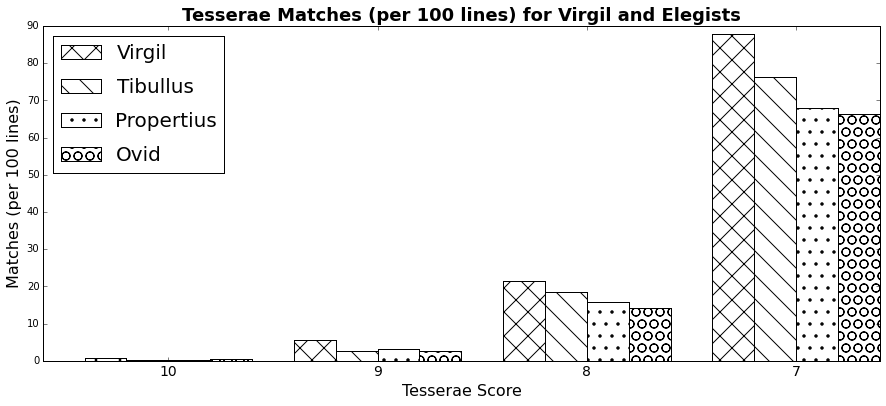

In [35]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ov, width, color='w', hatch='O')
rects2 = ax.bar(ind+width, prop, width, color='w', hatch='.')
rects3 = ax.bar(ind+width*2, tib, width, color='w', hatch='\\')
rects4 = ax.bar(ind+width*3, verg, width, color='w', hatch='x')
#rects5 = ax.bar(ind+width*4, y5, width, color='w', hatch='*')
#rects6 = ax.bar(ind+width*5, y6, width, color='w', hatch='o')
#rects7 = ax.bar(ind+width*6, y7, width, color='w', hatch='.')
#rects8 = ax.bar(ind+width*7, y8, width, color='w', hatch='O')

ax.set_title('Tesserae Matches (per 100 lines) for Virgil and Elegists', fontsize = 18, fontweight = 'bold')

ax.set_xlabel('Tesserae Score', fontsize = 16)
ax.set_ylabel('Matches (per 100 lines)', fontsize = 16)
ax.set_xticks(ind+width*2)
ax.tick_params(axis='x', labelsize = 14)
ax.set_xticklabels( ('7', '8', '9','10') )

ax.invert_xaxis()

auths = ['Virgil', 'Tibullus', 'Propertius', 'Ovid']

ax.legend( (rects4[0], rects3[0], rects2[0], rects1[0]), auths, loc = 2, labelspacing = .75, handlelength = 2, prop={'size':20} )


plt.show()